# Generative Learning Algorithms

- Algorithms that learn $p(y|x)$ directly from the training data are called the **descriminative learning algorithms**.
- Algorithms that model $p(x|y)$ and $p(y)$ from the training examples are called the **generative models**.
e.g. For a binary classification problem, we can learn $p(x|y=0)$ and $p(x|y=1)$  i.e. given the class labels $y$ how does the distribution of features look like. We'll also model the class distribution $p(y)$ and find the posterior distribution $p(y|x)$ for any new training example $x$ - 
$$
p(y|x) = \frac{p(x|y)p(y)}{p(x|y=0)p(y=0) + p(x|y=1)p(y=1)}
$$ 
To make the predictions - 
$$\begin{align*}
\hat{y} &= argmax_yp(y|x) = argmax_y\frac{p(x|y)p(y)}{p(x)} \\
&= argmax_yp(x|y)p(y)
\end{align*}
$$

## Gaussian Discriminant Analysis (GDA)
When $p(x|y)$ is distributed as multivariate Gaussian Distribution. 

### Multivariate Normal Distribution - 
Probability distribution function is given by - 
$$
p(x; \mu, \Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu))
$$
Where -
- $\mu \in \bf{R}^d$ - mean vector  = $E[X]$
- $\Sigma \in \bf{R}^{d \times d}$ - covariance matrix, symmetric and positive definite = $Cov(X)$
- $|\Sigma|$ - determinant of the covariance matrix

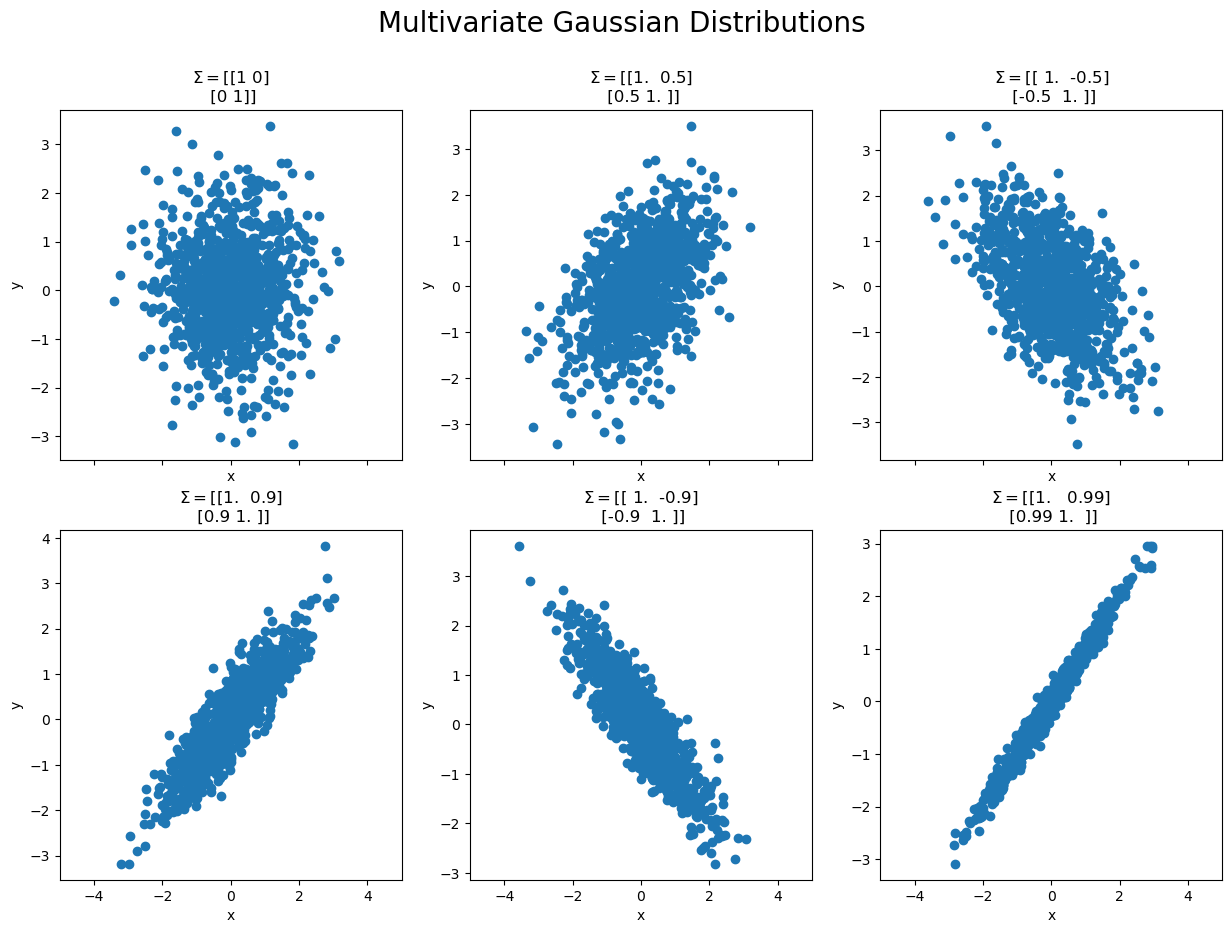

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# create list of covariance matrices
covs = [np.array([[1, 0], [0, 1]]),
        np.array([[1, 0.5], [0.5, 1]]),
        np.array([[1, -0.5], [-0.5, 1]]),
        np.array([[1, 0.9], [0.9, 1]]),
        np.array([[1, -0.9], [-0.9, 1]]),
        np.array([[1, 0.99], [0.99, 1]])]

# create a figure with 2x3 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True)
plt.suptitle('Multivariate Gaussian Distributions', fontsize=20)
# plot the gaussian distributions for each covariance matrix
# leave some space between the plots
for i, ax in enumerate(axs.flatten()):
        data = multivariate_normal(mean, covs[i]).rvs(1000)
        ax.scatter(data[:, 0], data[:, 1])
        ax.set_title(f'$\Sigma=${covs[i]}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_xlim(-5, 5)

We can see that as we increase the off-diagonal elements of the covariance matrix, the distribution becomes more and more linear suggesting a strong covariance between the components of the bi-variate distribution.

### Gaussian Discriminant Analysis Model
- Solving a classification problem 
- model $p(x|y)$ using a multivariate normal distribution 
$$\begin{align*}
y \sim Bernoulli(\phi) \\
x|y=0 \sim \mathcal{N}(\mu_0, \Sigma) \\
x|y=1 \sim \mathcal{N}(\mu_1, \Sigma) \\
\end{align*}
$$

$$\begin{align*}
p(y) &= \phi^y(1 - \phi)^{1 - y} \\
p(x|y = 0) &= \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(\frac{1}{2}(x - \mu_0)^T\Sigma^{-1}(x - \mu_0)) \\ 
p(x|y = 1) &= \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(\frac{1}{2}(x - \mu_1)^T\Sigma^{-1}(x - \mu_1)) \\
\end{align*}
$$

The log likelihood of the data is given by - 
$$\begin{align*}
l(\phi, \mu_0, \mu_1, \Sigma) &= log \Pi_{i = 1}^n p(x^{(i)}, y^{(i)}; \phi, \mu_0, \mu_1, \Sigma) \\
&= log \Pi_{i=1}^n p(x^{(i)}| y^{(i)};\mu_0, \mu_1, \Sigma)p(y^{(i)};\phi)

\end{align*}
$$

To find the values of the parameters which maximize the likelihood of the given data, we take the partial derivative of the log likelihood wrt the unknown parameters. 

$$
\begin{align*}
\frac{\partial l(\phi, \mu_0, \mu_1, \Sigma)}{\partial \phi} &= \frac{\delta}{\partial \phi} log \Pi p(y^{(i)}, \phi) \\
&= \Sigma_i\frac{\partial}{\partial \phi} log(p(y^{(i)};\phi)) \\
&= \Sigma_i\frac{\partial}{\partial \phi} log(\phi^{y^{(i)}}(1 - \phi)^{(1 - y^{(i)})}) \\
&= \Sigma_i [y^{(i)}\frac{1}{\phi} + (1-y^{(i)})\frac{1}{1 - \phi}] \\
\therefore \hat{\phi} &= argmax_{\phi} \frac{\partial l}{\partial \phi} \\
\end{align*}
$$
$\hat{\phi}$ is the solution to the following equation 
$$\begin{align*}
\Sigma_i [y^{(i)}\frac{1}{\phi} + (1-y^{(i)})\frac{1}{1 - \phi}]  &= 0 \\
\frac{\Sigma_1y^{(i)}}{\phi} - \frac{1-y^{(i)}}{1 - \phi} &= 0 \\
\Sigma y^{(i)} - \phi \Sigma y^{(i)} - n\phi + \phi\Sigma(y^(i)) &= 0\\
\hat{\phi} &= \frac{\Sigma y^{(i)}}{n}
\end{align*}
$$

Similarly - 
$$\begin{align*}
\frac{\partial l}{\partial \mu_0} &= \Sigma_i\frac{\partial}{\partial \mu_0}p(x^{(i)} | y^{(i)};\mu_0, \mu_1, \Sigma) \\
&= \Sigma_i 1(y^{(i)} = 0)\frac{\partial }{\partial \mu_0}  log \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(\frac{1}{2}(x - \mu_0)^T\Sigma^{-1}(x - \mu_0)) \\
&= \Sigma_i 1(y^{(i)} = 0)\frac{\partial }{\partial \mu_0} (log(\frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}) + \frac{1}{2}(x - \mu_0)^T\Sigma^{-1}(x^{(i)} - \mu_0)) \\
&= \frac{1}{2}\Sigma_i 1(y^{(i)} = 0)\frac{\partial }{\partial \mu_0} \frac{1}{2}(x - \mu_0)^T\Sigma^{-1}(x^{(i)} - \mu_0)) \\
&= \frac{1}{2}\Sigma_i 1(y^{(i)} = 0)\Sigma^{-1}(x - \mu_0)
\end{align*}
$$
$\therefore \hat{\mu_0}$ is the solution of the following equation.
$$\begin{align*}
\Sigma_i 1(y^{(i)} = 0)(x^{(i)} - \mu_0) &= 0 \\
\hat{\mu_0} &= \frac{\Sigma_{i=1}^n1(y^{(i)} = 0)x^{(i)}}{\Sigma_i1(y^{(i)} = 0)}
\end{align*}
$$
Similarly by symmetry - 
$$
\hat{\mu_1} = \frac{\Sigma_{i=1}^n1(y^{(i)} = 1)x^{(i)}}{\Sigma_i1(y^{(i)} = 1)}
$$